In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

In [ ]:
df_org = pd.read_csv("HeartAttack.csv")

In [ ]:
df = df_org.copy()
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
df = pd.get_dummies(df, columns=['gender'])
df.rename(columns={'gender_0': 'female', 'gender_1': 'male'}, inplace=True)

df.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,female,male
0,64,66,160,83,160.0,1.80,0.012,negative,0,1
1,21,94,98,46,296.0,6.75,1.060,positive,0,1
2,55,64,160,77,270.0,1.99,0.003,negative,0,1
3,64,70,120,55,270.0,13.87,0.122,positive,0,1
4,55,64,112,65,300.0,1.08,0.003,negative,0,1


In [ ]:
df.shape

(1319, 10)

In [ ]:
# Remove the outliers from columns using z-score
z_scores = stats.zscore(df[['impluse','glucose' ,'troponin' , 'kcm']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [ ]:
df.shape

(1223, 10)

In [ ]:
features = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin','female', 'male']

X = df[features]
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('rf',
                 RandomForestClassifier(random_state=42))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

    negative     1.0000    1.0000    1.0000        96
    positive     1.0000    1.0000    1.0000       149

    accuracy                         1.0000       245
   macro avg     1.0000    1.0000    1.0000       245
weighted avg     1.0000    1.0000    1.0000       245



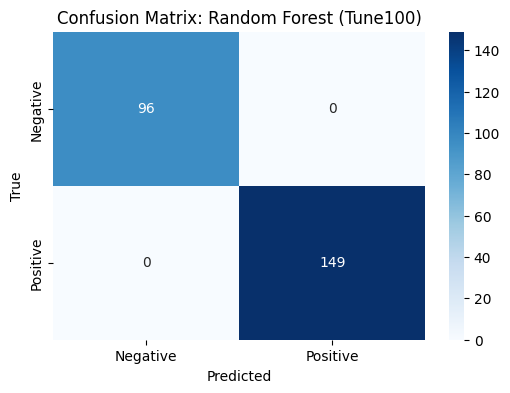

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ["Negative", "Positive"]

# Plot the confusion matrix using seaborn heatmap with custom labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix: Random Forest (Tune100)')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_Randforest(Tune100).png')

plt.show()

In [ ]:
import pickle
# Create a tuple or any container object with your variables
data_to_save = (model)

# Open a file in binary write mode
with open('model.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

In [ ]:
import pickle
import pandas as pd

with open('model.pkl', 'rb') as file:
    # Load the data from the file
    model = pickle.load(file)

In [ ]:
x_new =  pd.DataFrame()
x_new['age'] = ['21']
x_new['impluse'] = ['94']
x_new['pressurehight'] = ['98']
x_new['pressurelow'] = ['46']
x_new['glucose'] = ['296']
x_new['kcm'] = ['6.75']
x_new['troponin'] = ['1.06']
x_new['female'] = ['0']
x_new['male'] = ['1']

In [ ]:
y_pred_new = model.predict(x_new)

result = y_pred_new

print('AI for Heart Disease Preditced is: ', result)

Heart Disease Preditced is:  ['positive']


# Create App On Streamlit

In [4]:
%%writefile HDP_App.py

import pickle
import pandas as pd
import streamlit as st

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to make prediction
def predict_heart_disease(age, impulse, pressure_high, pressure_low, glucose, kcm, troponin, female, male):
    x_new = pd.DataFrame({
        'age': [age],
        'impluse': [impulse],
        'pressurehight': [pressure_high],
        'pressurelow': [pressure_low],
        'glucose': [glucose],
        'kcm': [kcm],
        'troponin': [troponin],
        'female': [female],
        'male': [male]
        })

    y_pred_new = model.predict(x_new)
    return y_pred_new

# Streamlit app
def main():
    st.markdown('<p style="text-align:center; font-weight:bold; font-size:30px;">Heart Disease Prediction App</p>', unsafe_allow_html=True)

    age = st.text_input("Enter age:")
    impulse = st.text_input("Enter impulse:")
    pressure_high = st.text_input("Enter high blood pressure:")
    pressure_low = st.text_input("Enter low blood pressure:")
    glucose = st.text_input("Enter glucose level:")
    kcm = st.text_input("Enter KCM:")
    troponin = st.text_input("Enter troponin level:")
    st.caption('<p style="color:red; font-weight:bold;">*** Please selected only one choice for gender!! ***</p>', unsafe_allow_html=True)
    female = st.checkbox("Female")
    male = st.checkbox("Male")

    if st.button("Predict"):

        result = predict_heart_disease(age, impulse, pressure_high, pressure_low, glucose, kcm, troponin, female, male)

        # Set color based on the result
        color = "red" if result == "positive" else "green"  # Adjust this condition based on your model's output

        # Apply styling with HTML
        styled_result = f'<p style="color:{color}; font-size:20px; text-align:center; font-weight:bold; background-color:#4B4A54; padding:10px; border-radius: 15px;">{result}</p>'

        # Display the styled result
        st.markdown(styled_result, unsafe_allow_html=True)

if __name__ == '__main__':
    main()

Overwriting HDP_App.py


In [ ]:
%%writefile requirements.txt

scikit-learn==1.2.2
pandas

Writing requirements.txt
